In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/data/Cleaned_epiclim_data.csv")
ind_data = pd.read_excel("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/data/2011-IndiaStateDist-0000.xlsx")

ind_data = ind_data.rename(columns={'Name':'district','TOT_P':'population'})
ind_data['district'] = ind_data['district'].str.strip().str.title()
df = df.merge(ind_data[['district','population']],on='district',how='left')


In [70]:
df.columns

Index(['Unnamed: 0', 'week_of_outbreak', 'state_ut', 'district', 'Disease',
       'Cases', 'Deaths', 'day', 'mon', 'year', 'Latitude', 'Longitude',
       'preci', 'LAI', 'Temp', 'week_no', 'week_start', 'population'],
      dtype='object')

In [71]:
df['cases_per_100k'] = (df['Cases']/df['population'])*100000

In [72]:
district_burden = df.groupby('district')['cases_per_100k'].mean().nlargest(15).reset_index()

In [73]:
"C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/"

'C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/'

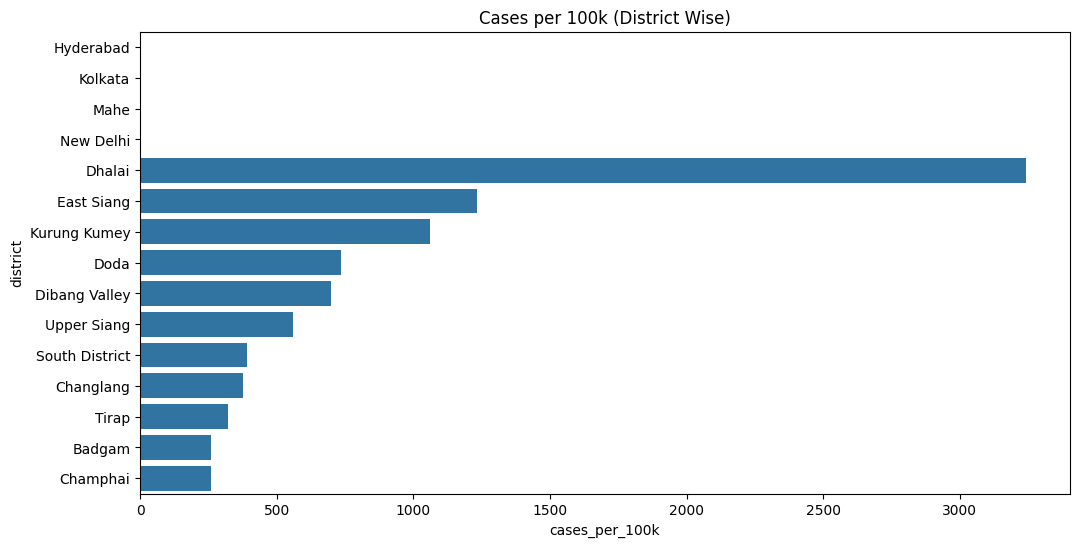

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(y='district',x='cases_per_100k',data=district_burden)
plt.title("Cases per 100k (District Wise)")
plt.savefig("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/cases_100k.png")


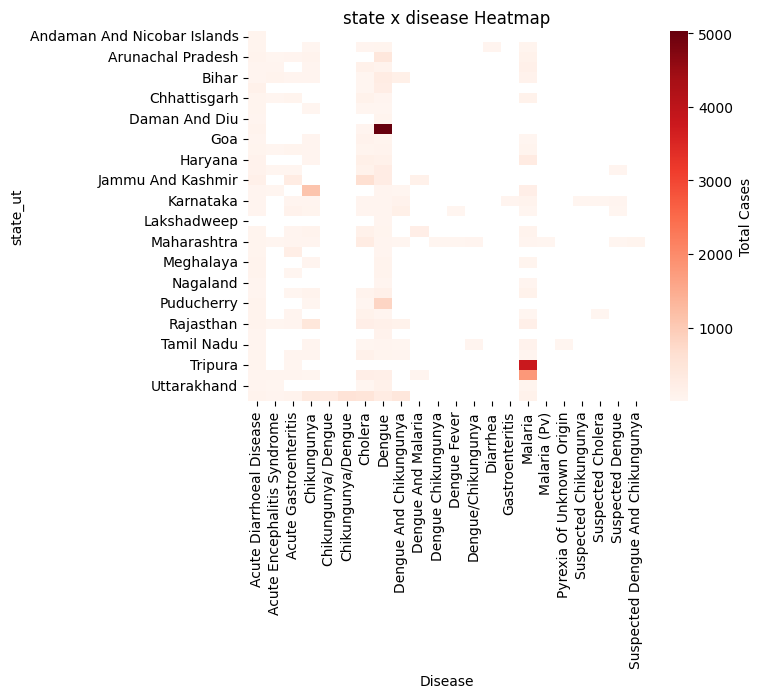

In [75]:
pivot = df.pivot_table(index='state_ut',columns='Disease',values='Cases')
sns.heatmap(pivot,cmap='Reds',cbar_kws={'label':'Total Cases'})
plt.title("state x disease Heatmap")
plt.savefig("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/state_disease.png")

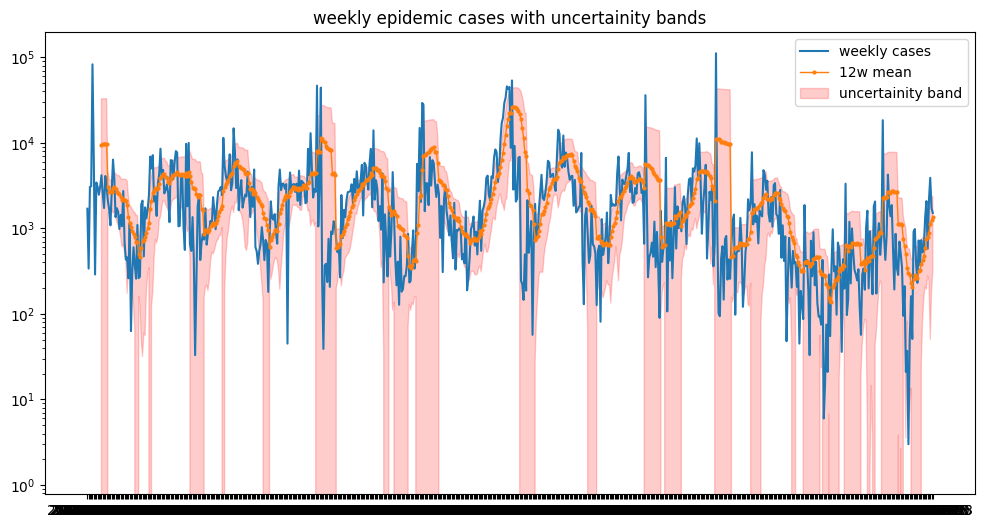

In [76]:
weekly = df.groupby('week_start')['Cases'].sum().reset_index()
weekly = weekly[weekly['Cases']>0]
weekly['rolling_mean'] = weekly['Cases'].rolling(12).mean()
weekly['rolling_std'] = weekly['Cases'].rolling(12).std()

plt.figure(figsize=(12,6))

plt.plot(weekly['week_start'],weekly['Cases'],label='weekly cases')
plt.plot(weekly['week_start'],weekly['rolling_mean'],label='12w mean',marker='o',markersize=2,linewidth=1)
plt.fill_between(weekly['week_start'],(weekly['rolling_mean']-weekly['rolling_std']).clip(lower=0),
                 weekly['rolling_mean']+weekly['rolling_std'],label='uncertainity band',alpha=0.2,color='red')
plt.yscale('log')
plt.legend()
plt.title("weekly epidemic cases with uncertainity bands")

plt.savefig("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/cases_trend.png")

In [77]:
df['mortality_rate'] = np.where(df['Cases']>0, (df['Deaths']/df['Cases'])*100,0)

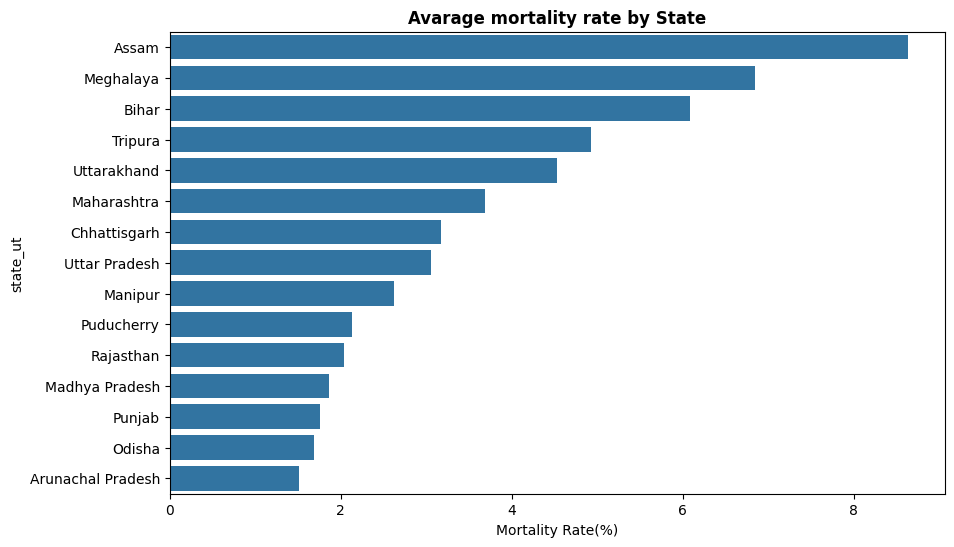

In [78]:
mortality_state =df.groupby('state_ut')['mortality_rate'].mean().nlargest(15)
plt.figure(figsize=(10,6))
sns.barplot(y=mortality_state.index,x=mortality_state.values)
plt.title("Avarage mortality rate by State",fontweight='bold')
plt.xlabel("Mortality Rate(%)",fontsize=10)
plt.savefig("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/mortality_rate.png")

In [79]:
state_data = df.groupby('state_ut').agg({'population':'sum','Cases':'sum'}).reset_index()
state_data['case_percentage'] = (state_data['Cases']/state_data['population'])*100
state_data.sort_values(by='case_percentage',ascending=False)

,state_ut,population,Cases,case_percentage
0,Andaman And Nicobar Islands,0.000000e+00,124.0,inf
7,Dadra And Nagar Haveli,0.000000e+00,232.0,inf
29,Sikkim,0.000000e+00,670.0,inf
9,Delhi,5.121836e+06,242195.0,4.728675
2,Arunachal Pradesh,1.683960e+07,63026.0,0.374273
8,Daman And Diu,1.041480e+05,275.0,0.264047
32,Tripura,2.820924e+07,70720.0,0.250698
26,Puducherry,1.251874e+08,96033.0,0.076711
23,Mizoram,2.125478e+06,1585.0,0.074571
18,Lakshadweep,1.031568e+06,666.0,0.064562


In [80]:
state_data.head()

,state_ut,population,Cases,case_percentage
0,Andaman And Nicobar Islands,0.000000e+00,124.0,inf
1,Andhra Pradesh,1.706521e+09,31751.0,0.001861
2,Arunachal Pradesh,1.683960e+07,63026.0,0.374273
3,Assam,9.035573e+08,78329.0,0.008669
4,Bihar,2.385522e+09,71113.0,0.002981


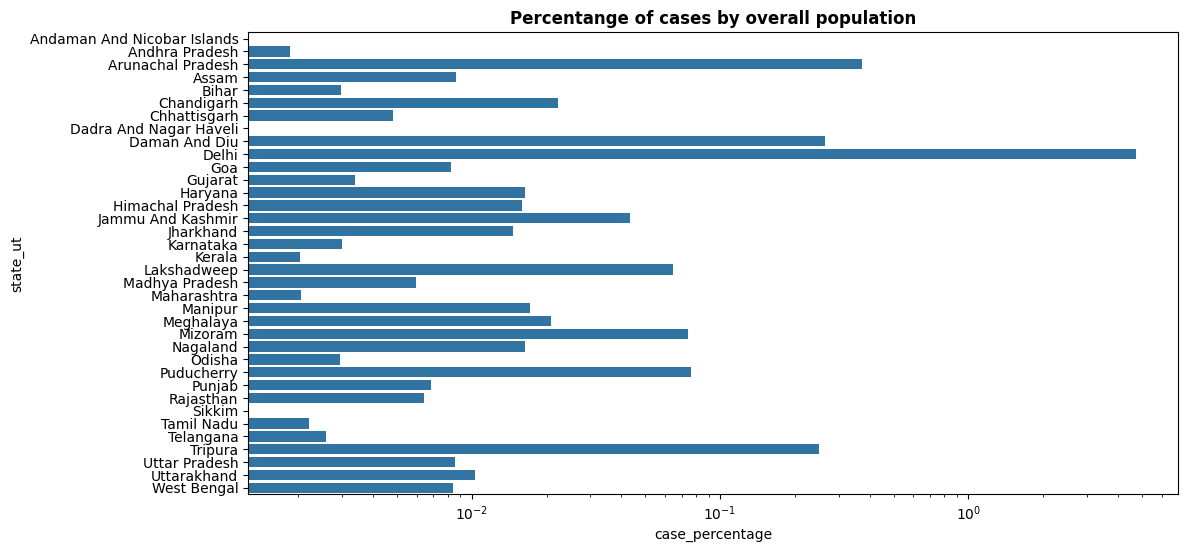

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(x='case_percentage',y='state_ut',data=state_data)
plt.xscale('log')
plt.title("Percentange of cases by overall population",fontweight='bold')
plt.savefig("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/cases_state.png")

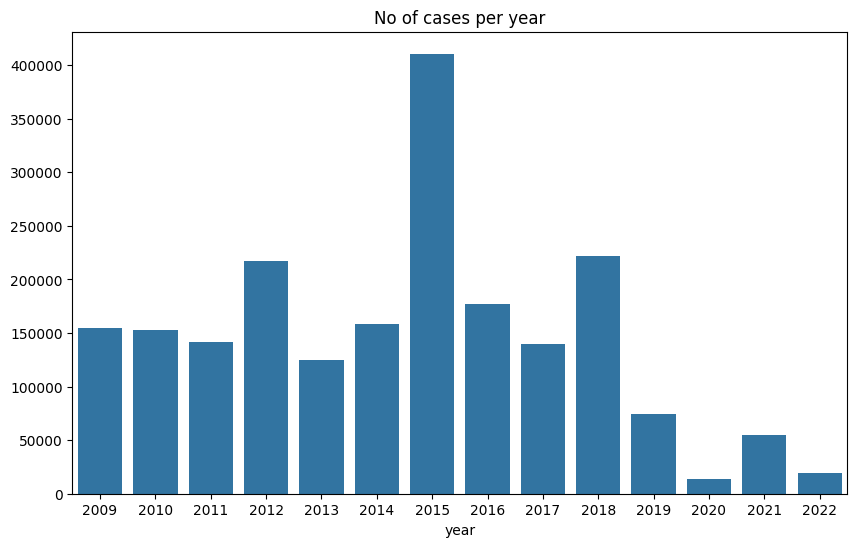

In [87]:
yearly_data = df.groupby('year')['Cases'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=yearly_data.index,y=yearly_data.values)
plt.title('No of cases per year')
plt.savefig("C:/Users/bikek/data_analysis projects/EpiClim_public_health_district_level_analysis/reports/figures/yearly_cases.png")

In [88]:
df['mortality_rate'].mean()

np.float64(2.1759885524436213)